In [58]:
#!pip install pandas
#!pip install matplotlib
#!pip install scikit-learn

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np # sayısal hesaplamalar için

In [60]:
data_train=pd.read_csv("C:\\Users\\ALN\\Desktop\\archive (4)\\train.csv")


In [61]:
data_train.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [62]:
data_train.shape

(2000, 21)

In [63]:
data_train.info() #null değerleri kontrol etmek ve veri tiplerini anlamak için 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [64]:
data_train.isnull().sum() #her sütun için eksik değer (NaN) sayısını belirlemenizi sağlar.

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [65]:
data_train.describe() # genel dağılım 


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


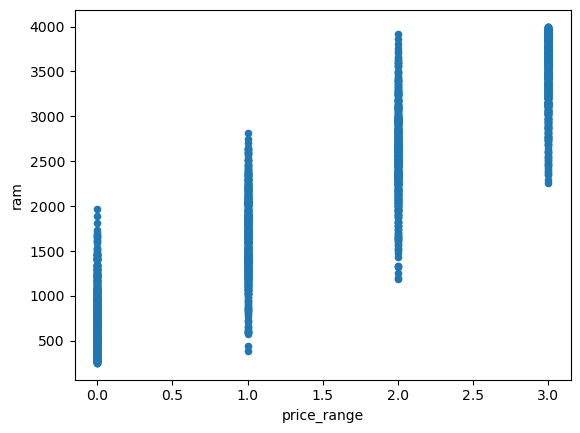

In [66]:
data_train.plot(x='price_range',y='ram',kind='scatter')
plt.show()

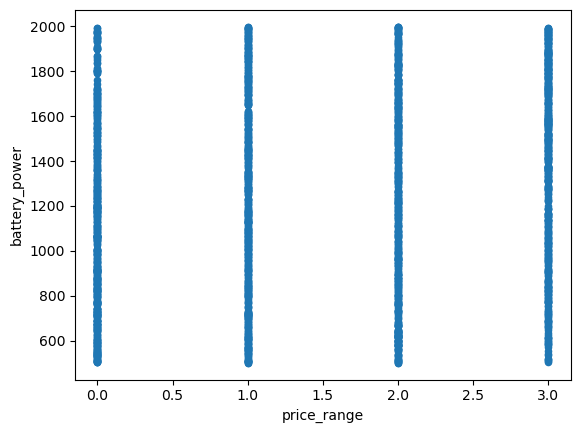

In [67]:
data_train.plot(x='price_range',y='battery_power',kind='scatter')
plt.show()

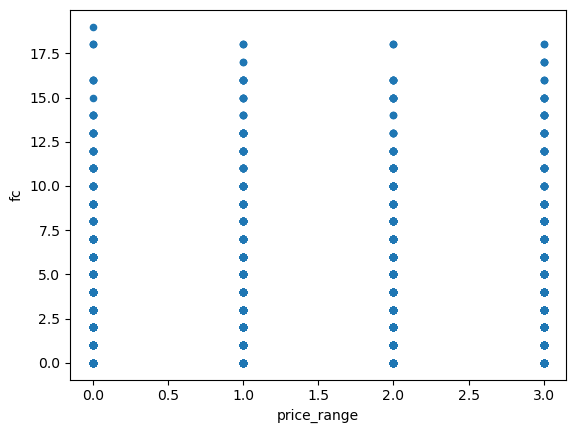

In [68]:
data_train.plot(x='price_range',y='fc',kind='scatter')
plt.show()

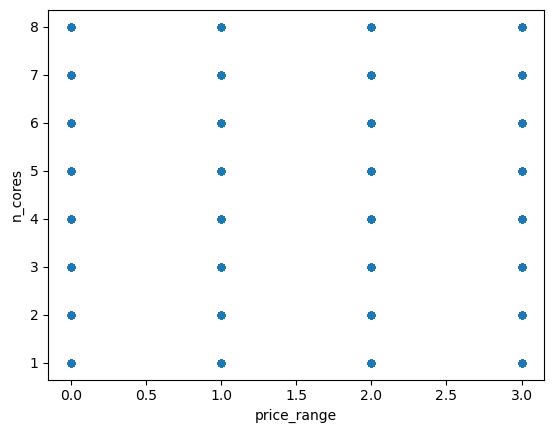

In [69]:
data_train.plot(x='price_range',y='n_cores',kind='scatter')
plt.show()

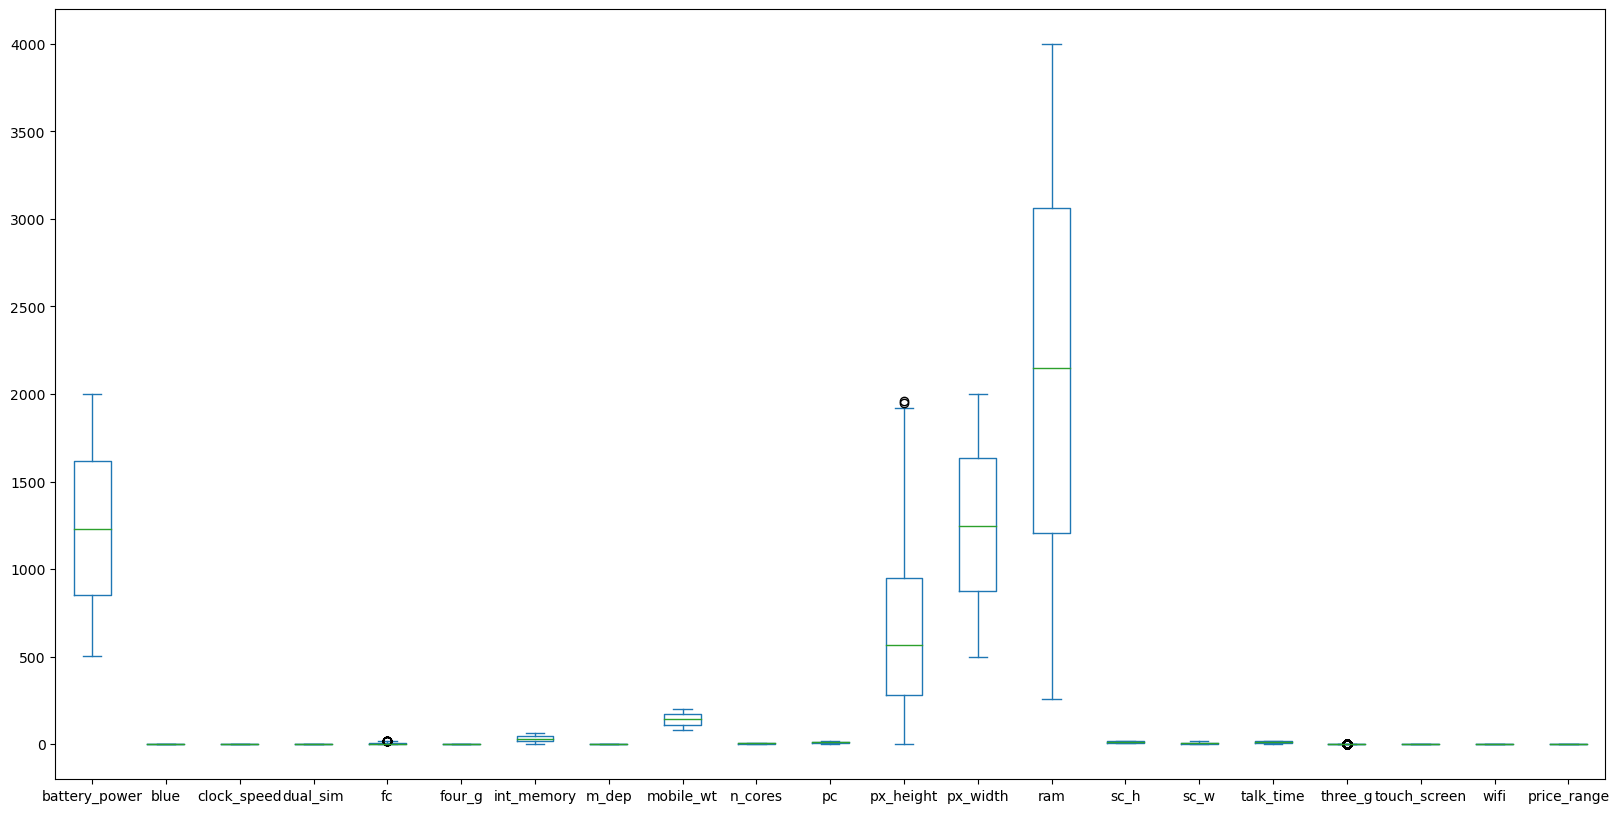

In [70]:
data_train.plot(kind='box',figsize=(20,10))
plt.show()

In [71]:
X=data_train.drop('price_range',axis=1)

y=data_train['price_range']

In [72]:
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [73]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 42)

In [75]:
X_train


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
968,1923,0,0.5,1,7,0,46,0.5,191,1,10,767,1759,1489,10,9,3,1,1,1
240,633,1,2.2,0,0,1,49,0.1,139,8,1,529,1009,3560,11,1,16,1,1,1
819,1236,0,0.9,1,2,1,57,0.1,188,1,14,517,809,1406,14,12,20,1,0,1
692,781,0,1.1,0,2,0,38,0.4,198,5,7,304,1674,3508,13,8,5,0,0,1
420,1456,1,0.5,1,7,0,7,0.4,105,5,12,823,1104,1587,6,5,20,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,1975,1,1.9,1,2,0,31,0.9,151,1,17,775,1607,3022,13,5,19,0,0,1
1294,589,1,0.5,0,1,1,59,0.7,146,8,4,759,1858,362,16,10,6,1,1,1
860,1829,1,0.5,0,0,1,15,0.4,160,5,7,729,1267,2080,16,11,12,1,0,1
1459,1927,0,0.9,1,3,0,11,0.4,190,8,12,491,1506,2916,16,11,18,0,1,1


In [76]:
y_train


968     1
240     2
819     0
692     3
420     1
       ..
1130    3
1294    0
860     2
1459    3
1126    1
Name: price_range, Length: 1600, dtype: int64

In [77]:
X_test


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1860,1646,0,2.5,0,3,1,25,0.6,200,2,5,211,1608,686,8,6,11,1,1,0
353,1182,0,0.5,0,7,1,8,0.5,138,8,16,275,986,2563,19,17,19,1,0,0
1333,1972,0,2.9,0,9,0,14,0.4,196,7,18,293,952,1316,8,1,8,1,1,0
905,989,1,2.0,0,4,0,17,0.2,166,3,19,256,1394,3892,18,7,19,1,1,0
1289,615,1,0.5,1,7,0,58,0.5,130,5,8,1021,1958,1906,14,5,5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,1379,0,0.5,1,1,0,19,0.3,134,8,17,387,671,3912,11,2,19,0,1,1
1284,991,0,2.0,0,2,1,12,0.3,158,5,6,1209,1678,2014,11,9,10,1,0,0
1739,1044,0,1.8,0,4,1,12,0.7,104,6,5,1230,1263,1794,18,7,19,1,1,1
261,728,0,2.7,1,0,0,25,0.2,88,4,1,526,1529,2039,5,1,12,1,1,1


In [78]:
y_test


1860    0
353     2
1333    1
905     3
1289    1
       ..
965     3
1284    2
1739    1
261     1
535     2
Name: price_range, Length: 400, dtype: int64

In [79]:
# Özellik seçimi yapın (örnek olarak k=15)
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=15)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)


In [80]:
#Özelliklerin indeksleri
secilen_indeksler = selector.get_support(indices=True)

#Orijinal özellik isimleri
secilen_ozellik_isimleri = X.columns[secilen_indeksler]

print("Seçilen Önemli 15 Özellik:")
print(secilen_ozellik_isimleri)

Seçilen Önemli 15 Özellik:
Index(['battery_power', 'blue', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w',
       'talk_time', 'touch_screen'],
      dtype='object')


In [81]:
# StandartScaler'ı oluşturuldu ve eğitim setini standardize edildi
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_selected)
X_test_std = scaler.transform(X_test_selected)

In [82]:
X_train_std

array([[ 1.54835969, -0.98142253, -1.23622976, ...,  0.75950883,
        -1.44512258,  0.9900495 ],
       [-1.3795348 ,  1.01892912,  0.83711156, ..., -1.08486853,
         0.91592916,  0.9900495 ],
       [-0.01091435, -0.98142253, -0.74838475, ...,  1.45115034,
         1.64240661, -1.0100505 ],
       ...,
       [ 1.33500924,  1.01892912, -1.23622976, ...,  1.22060317,
         0.1894517 , -1.0100505 ],
       [ 1.55743843, -0.98142253, -0.74838475, ...,  1.22060317,
         1.27916788,  0.9900495 ],
       [-1.37499543,  1.01892912, -1.11426851, ...,  1.45115034,
         0.1894517 , -1.0100505 ]])

In [83]:
X_test_std


array([[ 0.91965677, -0.98142253,  1.20299532, ...,  0.06786732,
         0.00783234,  0.9900495 ],
       [-0.13347738, -0.98142253, -1.23622976, ...,  2.60388619,
         1.46078725, -1.0100505 ],
       [ 1.65957429, -0.98142253,  1.69084034, ..., -1.08486853,
        -0.53702576,  0.9900495 ],
       ...,
       [-0.446694  , -0.98142253,  0.34926654, ...,  0.29841449,
         1.46078725,  0.9900495 ],
       [-1.16391466, -0.98142253,  1.44691783, ..., -1.08486853,
         0.1894517 ,  0.9900495 ],
       [-0.12666832, -0.98142253,  0.4712278 , ..., -0.85432136,
        -1.44512258,  0.9900495 ]])

In [84]:
y_test


1860    0
353     2
1333    1
905     3
1289    1
       ..
965     3
1284    2
1739    1
261     1
535     2
Name: price_range, Length: 400, dtype: int64

# Training the model (Model Eğitimi)

# 1) Decision Tree(Karar Ağacı)

In [85]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [86]:
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)


In [87]:
y_pred


array([0, 2, 1, 3, 1, 1, 2, 0, 2, 1, 0, 1, 1, 2, 2, 2, 3, 3, 1, 0, 0, 1,
       1, 2, 0, 1, 2, 2, 2, 0, 1, 0, 3, 0, 1, 1, 2, 1, 3, 0, 2, 3, 2, 0,
       2, 2, 1, 1, 3, 1, 3, 1, 0, 0, 0, 0, 1, 3, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 2, 0, 1, 3, 0, 0, 3, 2, 2, 3, 2, 1, 0, 1, 3, 2, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 0, 0, 0, 1, 0, 0, 3, 2, 0, 1, 1,
       0, 0, 2, 2, 2, 2, 3, 2, 0, 2, 1, 3, 2, 1, 3, 3, 0, 3, 1, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 0, 2, 3, 1, 3, 3, 0, 0, 0, 1, 2, 3, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 1, 2, 3, 3, 3, 1, 0, 1, 2, 2, 3, 3, 1, 1, 0, 3, 1,
       2, 2, 1, 1, 0, 0, 0, 0, 3, 3, 0, 3, 0, 1, 0, 0, 1, 3, 3, 1, 0, 1,
       1, 1, 1, 1, 2, 2, 3, 3, 1, 2, 0, 0, 1, 2, 1, 1, 3, 1, 1, 3, 1, 1,
       3, 1, 3, 0, 0, 1, 1, 3, 0, 1, 2, 0, 2, 3, 2, 0, 1, 3, 3, 0, 2, 3,
       3, 3, 0, 3, 1, 2, 3, 3, 2, 0, 1, 3, 3, 0, 3, 3, 3, 2, 3, 0, 1, 2,
       2, 1, 2, 0, 2, 3, 2, 3, 2, 1, 0, 2, 0, 2, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 3, 0, 1, 3, 3, 3, 3, 0, 1, 0, 1, 3, 3,

In [88]:
y_test


1860    0
353     2
1333    1
905     3
1289    1
       ..
965     3
1284    2
1739    1
261     1
535     2
Name: price_range, Length: 400, dtype: int64

In [89]:
from sklearn.metrics import accuracy_score
dt_ac=accuracy_score(y_test,y_pred)


In [90]:
dt_ac


0.8225

# 2) KNN

In [91]:
#KNN'nin avantajları şunlardır:

#Basit ve anlaşılır.
#Eğitim süreci yoktur; sadece veri noktalarının saklandığı bir yapıdır.
#Ancak, KNN'nin dezavantajları şunlar olabilir:

#Tahmin yapmak için tüm veri setine erişim gerektirir, bu nedenle büyük veri setlerinde maliyetli olabilir.
#Boyutluluk laneti (curse of dimensionality) ile başa çıkmak için özel önlemler alınmalıdır.
#Aşırı uyma (overfitting) eğilimlidir, bu nedenle uygun bir k değerinin seçilmesi önemlidir.

In [92]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# K-En Yakın Komşular (KNN) sınıflandırıcı oluşturuldu
## knn_classifier = KNeighborsClassifier()
knn_classifier = KNeighborsClassifier(n_neighbors=5)




In [93]:
# Standartlaştırılmış eğitim verisini kullanarak modeli eğitin
knn_classifier.fit(X_train_std, y_train)


KNeighborsClassifier()

In [94]:
# Standartlaştırılmış test verisini kullanarak tahmin yapın
y_pred_knn = knn_classifier.predict(X_test_std)

# Modelin doğruluğunu değerlendirin
knn_ac = accuracy_score(y_test, y_pred_knn)


In [95]:
knn_ac

0.5875

# 3) Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [97]:
lr.fit(X_train_std,y_train)

LogisticRegression()

In [98]:
y_pred=lr.predict(X_test_std)

In [99]:
y_pred

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 0, 2, 3, 3, 2, 3, 3, 1, 0, 0, 2,
       1, 2, 0, 1, 3, 2, 2, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 0, 2, 3, 2, 0,
       2, 3, 2, 1, 3, 1, 3, 1, 0, 0, 1, 0, 1, 3, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 2, 0, 1, 2, 0, 1, 3, 2, 2, 3, 2, 1, 0, 1, 3, 1, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 1, 0, 0, 1, 0, 0, 3, 2, 0, 1, 1,
       0, 0, 3, 1, 3, 2, 3, 2, 0, 2, 1, 3, 2, 1, 3, 3, 0, 2, 0, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 0, 2, 2, 1, 2, 2, 0, 0, 0, 1, 1, 2, 3, 1, 1, 0,
       2, 2, 0, 2, 0, 2, 2, 3, 3, 2, 1, 0, 1, 2, 2, 3, 3, 0, 1, 0, 3, 1,
       1, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       1, 1, 1, 2, 2, 3, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 1, 2, 1, 1,
       3, 2, 3, 0, 0, 2, 1, 3, 0, 1, 2, 0, 2, 3, 1, 0, 1, 3, 3, 0, 1, 3,
       2, 3, 0, 3, 1, 2, 3, 3, 2, 1, 0, 3, 3, 1, 3, 3, 3, 3, 3, 0, 1, 2,
       2, 2, 3, 0, 2, 3, 2, 2, 2, 1, 0, 1, 0, 3, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 1, 1, 0, 1, 3, 3,

In [100]:
lr_ac=accuracy_score(y_test,y_pred)

In [101]:
lr_ac

0.9825

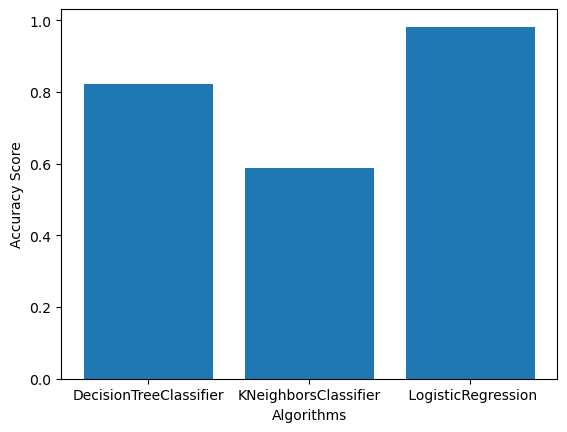

In [102]:
plt.bar(x=['DecisionTreeClassifier','KNeighborsClassifier',' LogisticRegression'],height=[dt_ac,knn_ac ,lr_ac])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
plt.show()